In [1]:
import os
from google.cloud import bigquery
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/Rebecca/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Data Import: Actual_Highspeed_broadband_demo_table

In [3]:
%%bigquery data
SELECT *
FROM `broadband-data.CountyInfo.Actual_Highspeed_broadband_demo_table`

Downloading: 100%|██████████████████████| 3019/3019 [00:01<00:00, 1604.70rows/s]


In [4]:
data.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
0,0.430247,22019,181.224029,0.254254,0.101485,0.126193,57252.0,0.0,0.0,0.0,0.205003,1.161365,0.476500,0.076,77.143932,55.8,30.229559,-93.358015
1,0.592540,51550,652.021714,0.258860,0.090865,0.104163,80402.0,0.0,0.0,0.0,0.076271,1.272905,0.486258,0.074,244.119718,45.2,36.679376,-76.301788
2,0.183172,55039,141.215784,0.226737,0.090837,0.149804,69280.0,0.0,0.0,0.0,0.351293,1.132644,0.491238,0.083,61.011533,24.6,43.754722,-88.493284
3,0.468755,22075,29.548602,0.274672,0.083977,0.111839,55861.0,0.0,0.0,0.0,0.195382,1.095738,0.487501,0.057,12.305719,58.4,29.282447,-89.576068
4,0.116187,17099,100.355884,0.230136,0.082546,0.163951,62714.0,0.0,0.0,0.0,0.302149,0.623091,0.296241,0.121,44.025722,28.3,41.343341,-88.885931


In [5]:
data.columns

Index(['broadband_rate', 'Countycode', 'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude'],
      dtype='object')

In [6]:
data = data.drop(columns=['housing_density','Householder_65_years_and_over_ratio'])

In [7]:
print(len(data))
print(data.Countycode.nunique())


3019
3016


In [8]:
#Normalize 
cols_to_norm = ['broadband_rate',  'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio',
       'winter_avg_temp', 'latitude', 'longitude']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


### County Level

#### 1. Summary

In [9]:

data_county = data.sort_values('broadband_rate',ascending=False)
#data_county = data_county.reset_index()

In [10]:
data_county.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,winter_avg_temp,latitude,longitude
2653,3.707093,38085,-0.159227,4.025195,0.806089,-2.171319,-1.439911,-1.332031,-1.094214,1.324821,0.583045,0.258380,-1.384678,-1.351792,1.597751,-0.894716
2619,3.705840,38005,-0.158592,3.135511,-0.012041,-0.776097,-0.404680,-0.119122,0.081279,1.324821,0.507297,0.216954,-1.287481,-1.873562,1.998673,-0.740790
2660,3.705341,38103,-0.159536,-1.631407,-1.220299,3.173195,-0.015752,0.332963,1.286531,1.324821,0.457472,0.087529,-1.741070,-1.759721,1.898318,-0.770588
2486,3.704242,38041,-0.160249,-1.405182,-0.893605,2.377724,-0.264437,0.724402,1.078216,1.324821,0.385125,-0.032211,-2.032663,-1.418199,1.664210,-1.020093
2936,3.701588,38047,-0.160365,-0.723157,-1.199445,2.921577,-0.631014,0.845693,0.780623,1.324821,0.269696,0.226247,-1.870667,-1.503580,1.671073,-0.754600


#### 2. Correlation

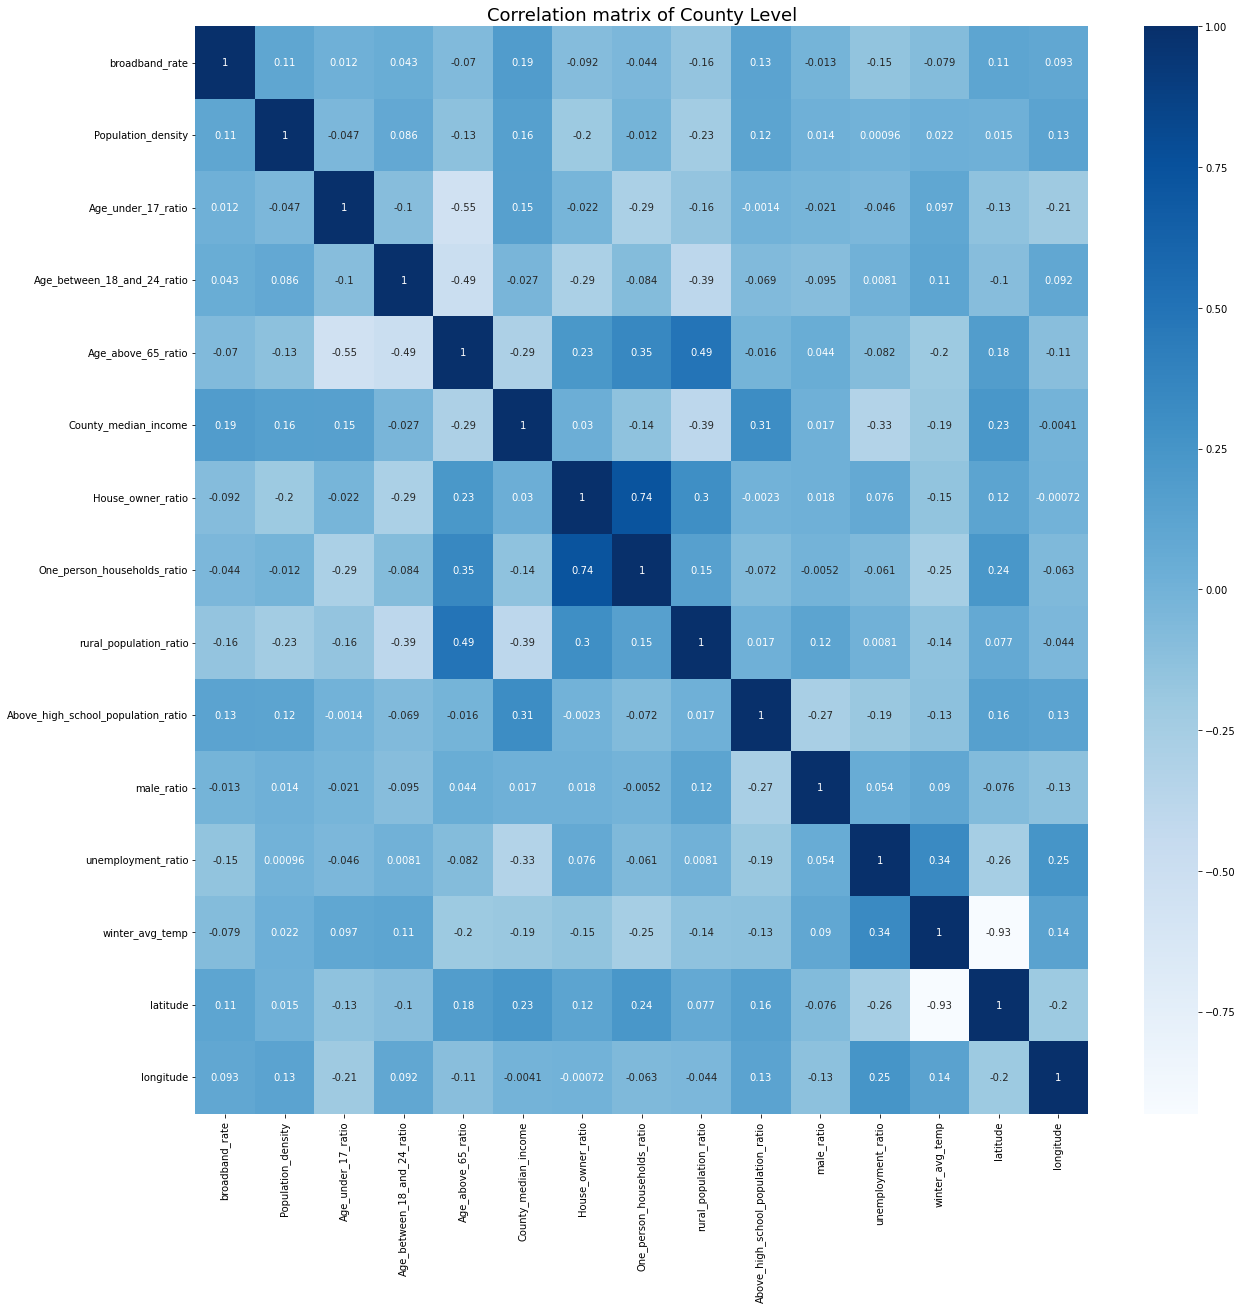

In [11]:
data_county2 = data_county.drop(['Countycode'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [12]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

broadband_rate                        1.000000
County_median_income                  0.187868
Above_high_school_population_ratio    0.127595
latitude                              0.114513
Population_density                    0.107470
longitude                             0.093003
Age_between_18_and_24_ratio           0.042527
Age_under_17_ratio                    0.011947
male_ratio                           -0.013048
One_person_households_ratio          -0.043912
Age_above_65_ratio                   -0.069932
Name: broadband_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

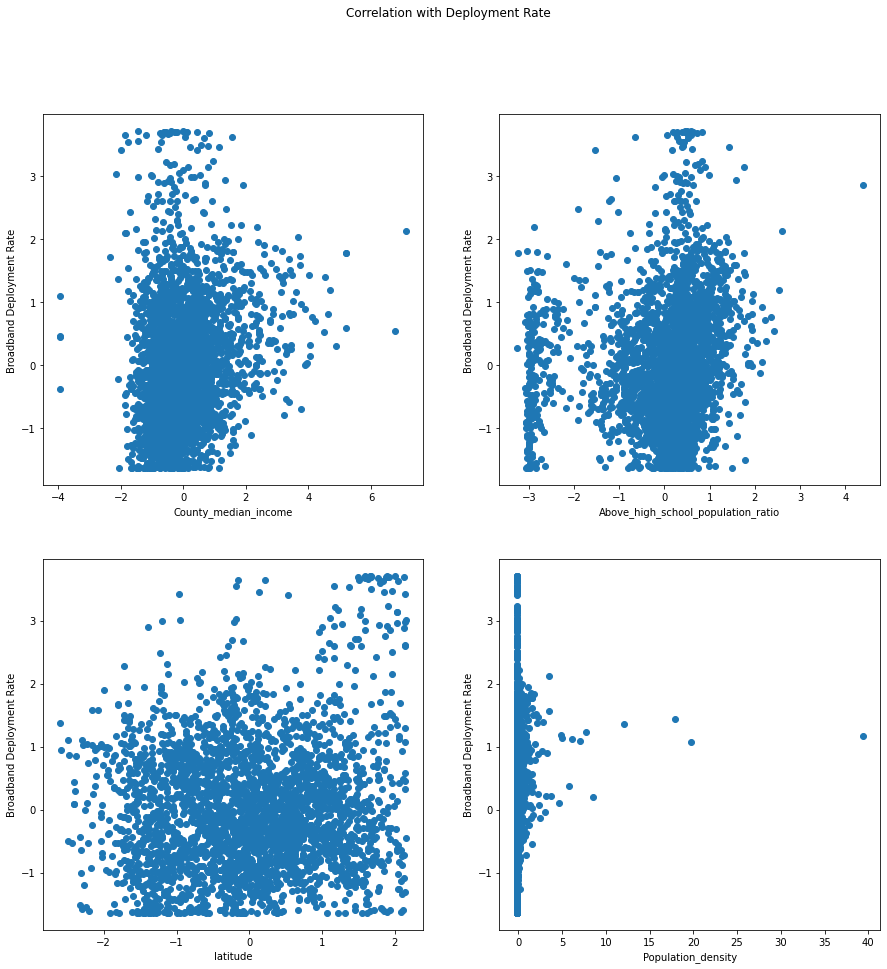

In [13]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['County_median_income'],data_county2['broadband_rate'])
ax[0,0].set_xlabel("County_median_income")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['Above_high_school_population_ratio'],data_county2['broadband_rate'])
ax[0,1].set_xlabel("Above_high_school_population_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['latitude'],data_county2['broadband_rate'])
ax[1,0].set_xlabel("latitude")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['Population_density'],data_county2['broadband_rate'])
ax[1,1].set_xlabel("Population_density")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#### 4. Regression

In [14]:
lr = LinearRegression()
X = data_county2.drop(['broadband_rate'],axis=1)
y = data_county2['broadband_rate']
lr.fit(X,y)

LinearRegression()

In [15]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
12,latitude,0.420564
11,winter_avg_temp,0.334329
13,longitude,0.192864
1,Age_under_17_ratio,0.090547
3,Age_above_65_ratio,0.060468
9,male_ratio,0.049510
8,Above_high_school_population_ratio,0.049454
4,County_median_income,0.047999
6,One_person_households_ratio,0.036219
0,Population_density,0.023372


In [19]:
x = sm.add_constant(X)
mod = sm.OLS(X,y).fit()
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         broadband_rate   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     24.20
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.66e-60
Time:                        12:24:44   Log-Likelihood:                -4122.0
No. Observations:                3019   AIC:                             8274.
Df Residuals:                    3004   BIC:                             8364.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Data Import: 11_Actual_Highspeed_broadband_demo_table


In [20]:
%%bigquery data
SELECT *
FROM `broadband-data.CountyInfo.11_Actual_Highspeed_broadband_demo_table`


Downloading: 100%|██████████████████████| 3019/3019 [00:01<00:00, 1813.09rows/s]


In [22]:
data.head()



,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
0,1.000000,51735,794.117647,0.244362,0.069547,0.155638,99310.0,0.0,0.0,0.0,0.065021,1.283210,0.493580,0.062,308.888889,44.4,37.128360,-76.303534
1,0.977002,22103,276.451804,0.257277,0.072397,0.126756,67462.0,0.0,0.0,0.0,0.232181,1.313121,0.487606,0.059,112.846836,56.0,30.410022,-89.951962
2,0.954531,22121,123.574026,0.249159,0.099882,0.110013,62919.0,0.0,0.0,0.0,0.304607,1.202413,0.491761,0.074,48.436364,55.4,30.464052,-91.309808
3,0.147109,40091,32.743735,0.210201,0.064043,0.219484,37535.0,0.0,0.0,0.0,0.873000,1.039157,0.482175,0.105,21.584479,43.5,35.369108,-95.671787
4,0.982273,51630,2312.952381,0.196780,0.232603,0.099358,72437.0,0.0,0.0,0.0,0.010788,1.365231,0.455653,0.092,996.857143,40.9,38.299272,-77.486658


In [23]:
data.columns

Index(['broadband_rate', 'Countycode', 'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude'],
      dtype='object')

In [24]:
data = data.drop(columns=['housing_density','Householder_65_years_and_over_ratio'])

print(len(data))
print(data.Countycode.nunique())

3019
3016


In [25]:
#Normalize 
cols_to_norm = ['broadband_rate',  'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio',
       'winter_avg_temp', 'latitude', 'longitude']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


In [26]:
#### 1. Summary


data_county = data.sort_values('broadband_rate',ascending=False)
#data_county = data_county.reset_index()

data_county.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,winter_avg_temp,latitude,longitude
0,1.211463,51735,0.342772,0.303928,-0.508560,-0.104867,2.914863,-3.884656,-3.564237,-1.657713,1.064083,0.108944,-0.995888,0.583502,-0.238535,1.333685
1772,1.211463,27079,-0.122422,0.618316,-0.585586,-0.399945,1.483391,0.707863,-0.037759,0.117724,0.631070,0.197902,-0.153507,-1.399226,1.242607,-0.234850
2338,1.211463,51610,3.568402,0.387762,-0.749272,-1.341847,7.122495,-3.884656,-3.564237,-1.865125,2.604381,0.081079,-1.384678,0.175572,0.120526,1.255192
2337,1.211463,51600,2.113428,-0.956109,0.349473,-0.562475,3.157546,-3.884656,-3.564237,-1.865125,1.623292,0.103858,-1.190283,0.175572,0.114079,1.244083
2231,1.211463,48111,-0.158806,1.983292,0.167506,-1.610015,-0.124332,-0.405809,0.334233,-1.114157,-0.393647,-0.898623,-1.255082,-0.146977,-0.410667,-1.032675


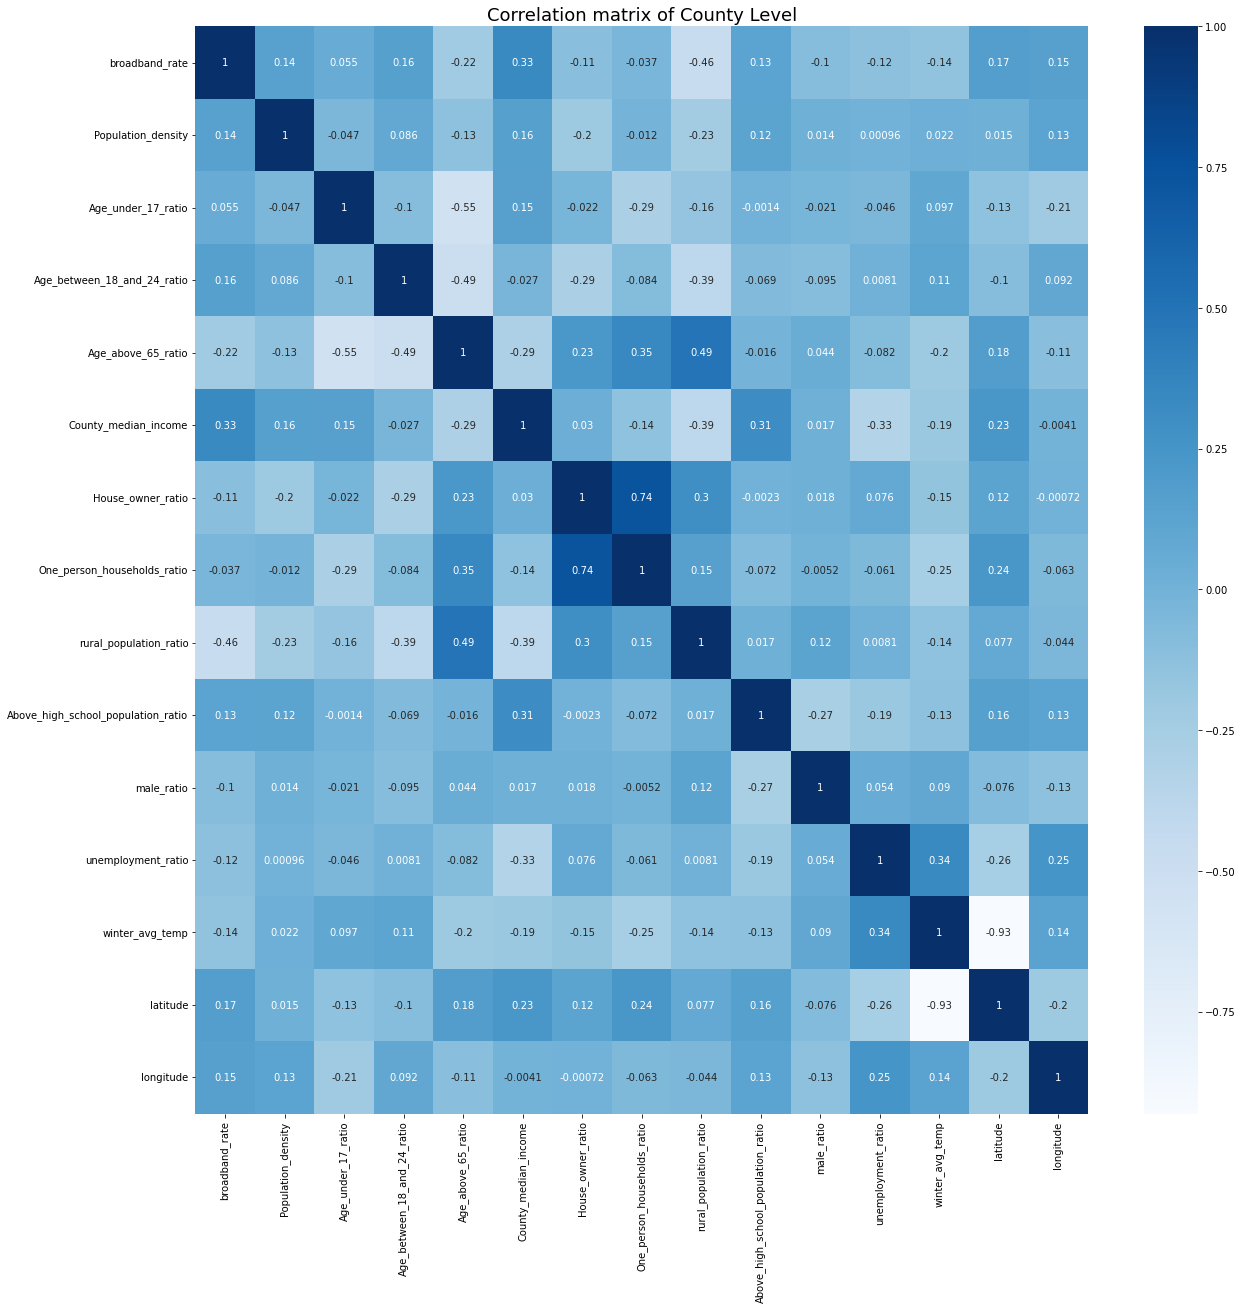

In [27]:
#### 2. Correlation

data_county2 = data_county.drop(['Countycode'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [28]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

broadband_rate                        1.000000
County_median_income                  0.333141
latitude                              0.170855
Age_between_18_and_24_ratio           0.159545
longitude                             0.152550
Population_density                    0.140348
Above_high_school_population_ratio    0.128958
Age_under_17_ratio                    0.055354
One_person_households_ratio          -0.036740
male_ratio                           -0.100777
House_owner_ratio                    -0.107063
Name: broadband_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

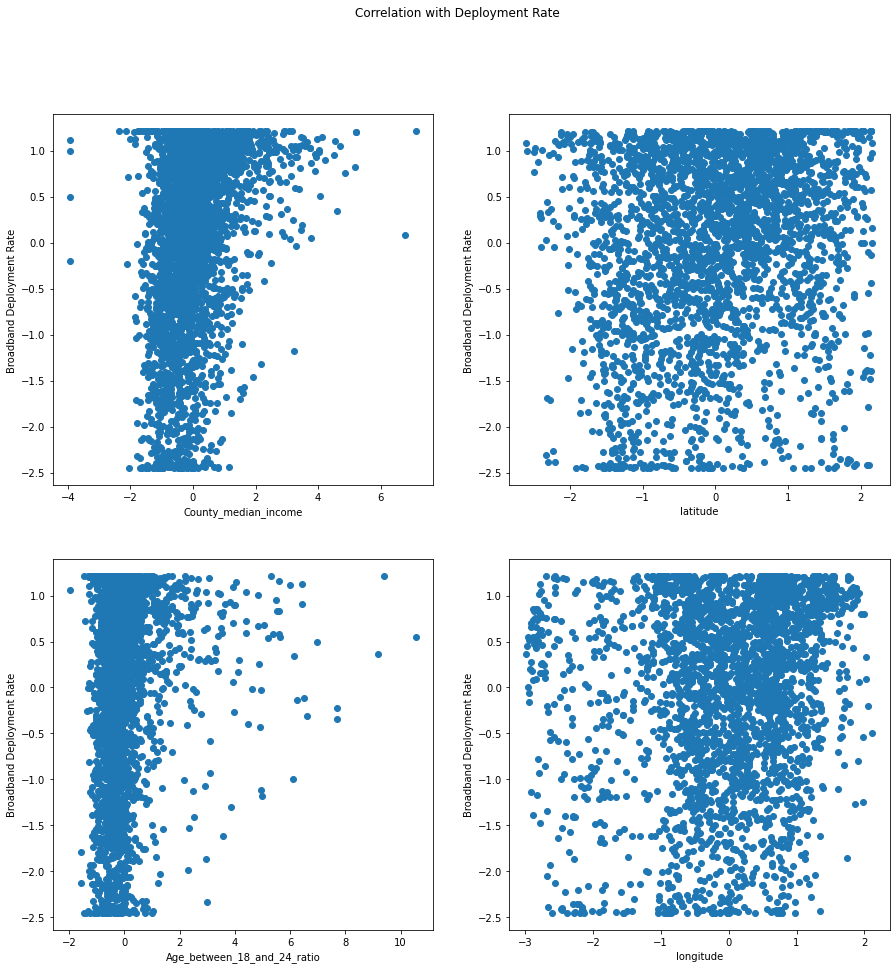

In [29]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['County_median_income'],data_county2['broadband_rate'])
ax[0,0].set_xlabel("County_median_income")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['latitude'],data_county2['broadband_rate'])
ax[0,1].set_xlabel("latitude")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['Age_between_18_and_24_ratio'],data_county2['broadband_rate'])
ax[1,0].set_xlabel("Age_between_18_and_24_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['longitude'],data_county2['broadband_rate'])
ax[1,1].set_xlabel("longitude")
ax[1,1].set_ylabel("Broadband Deployment Rate")

In [30]:
#### 4. Regression

lr = LinearRegression()
X = data_county2.drop(['broadband_rate'],axis=1)
y = data_county2['broadband_rate']
lr.fit(X,y)

coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
12,latitude,0.261158
13,longitude,0.223295
1,Age_under_17_ratio,0.097504
4,County_median_income,0.095399
11,winter_avg_temp,0.065387
3,Age_above_65_ratio,0.064642
6,One_person_households_ratio,0.043406
8,Above_high_school_population_ratio,0.040512
2,Age_between_18_and_24_ratio,0.034330
9,male_ratio,0.009786


In [31]:

x = sm.add_constant(X)
mod = sm.OLS(X,y).fit()
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:         broadband_rate   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     94.44
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          1.58e-225
Time:                        12:35:36   Log-Likelihood:                -3732.7
No. Observations:                3019   AIC:                             7495.
Df Residuals:                    3004   BIC:                             7586.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Data Import: 21_Actual_Highspeed_broadband_demo_table

In [32]:
%%bigquery data
SELECT *
FROM `broadband-data.CountyInfo.21_Actual_Highspeed_broadband_demo_table`


Downloading: 100%|██████████████████████| 3019/3019 [00:01<00:00, 1756.25rows/s]


In [33]:
#### 1. Summary
data.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
0,0.307910,22127,16.117251,0.224776,0.083785,0.143734,42991.0,0.0,0.0,0.0,0.648926,0.847842,0.495461,0.088,7.613935,50.9,31.941187,-92.641269
1,0.203443,22041,33.248479,0.256031,0.086291,0.163143,42706.0,0.0,0.0,0.0,0.741850,0.998796,0.485000,0.105,14.463657,51.2,32.139076,-91.672371
2,0.963196,22053,48.501689,0.265810,0.084573,0.145122,47924.0,0.0,0.0,0.0,0.506995,0.944293,0.424764,0.071,20.426773,55.2,30.269529,-92.816221
3,0.917010,22063,197.570988,0.275960,0.087779,0.098972,61680.0,0.0,0.0,0.0,0.411166,1.198733,0.494993,0.071,77.422840,55.4,30.440419,-90.727474
4,0.229528,22077,40.915127,0.240111,0.079291,0.154986,49583.0,0.0,0.0,0.0,0.578107,0.881765,0.406806,0.082,19.971290,54.7,30.708319,-91.604621


In [34]:
data.columns

Index(['broadband_rate', 'Countycode', 'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude'],
      dtype='object')

In [35]:
data = data.drop(columns=['housing_density','Householder_65_years_and_over_ratio'])

print(len(data))
print(data.Countycode.nunique())

3019
3016


In [36]:
#Normalize 
cols_to_norm = ['broadband_rate',  'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio',
       'winter_avg_temp', 'latitude', 'longitude']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


In [37]:
data_county = data.sort_values('broadband_rate',ascending=False)
#data_county = data_county.reset_index()

data_county.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,winter_avg_temp,latitude,longitude
410,1.408358,27037,0.288733,0.897298,-0.300965,-1.462346,2.311397,0.426688,-0.335352,-1.707834,1.136601,-0.021539,-0.736694,-1.351792,1.303421,-0.174758
1946,1.408358,55093,-0.116223,-0.345974,2.197487,-1.352421,1.618874,0.145513,-0.394870,-0.153773,-0.425126,-0.924695,-0.801492,-1.465633,1.314551,-0.117495
1660,1.408358,27147,-0.107571,0.904389,-0.468811,-0.386277,0.929663,0.531439,0.096158,-0.889896,-1.218349,-1.707432,-0.477500,-1.475119,1.169387,-0.188977
753,1.408358,27003,0.335280,0.787231,-0.200527,-1.522701,1.912467,0.713376,-0.692463,-1.434462,0.958389,0.157022,-0.412701,-1.503580,1.426739,-0.190981
2940,1.408358,17069,-0.146179,-0.978411,-0.672486,1.054521,-1.199022,0.547979,0.691345,1.324821,0.053198,0.135682,0.526877,0.052245,-0.158909,0.256951


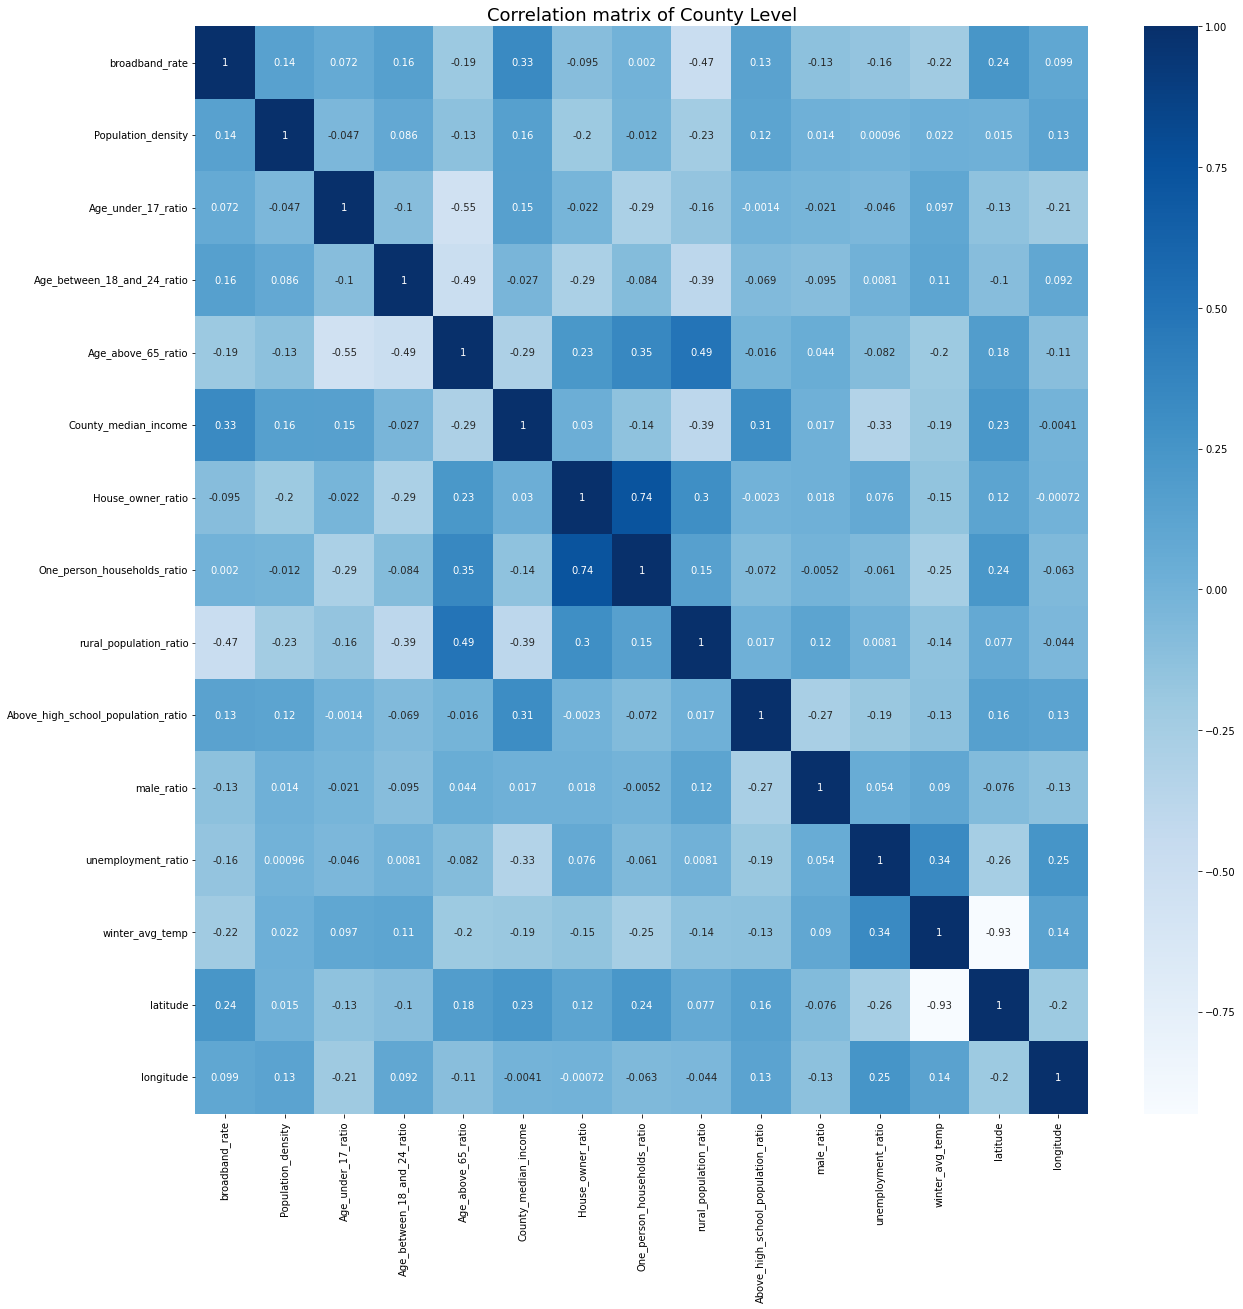

In [38]:
#### 2. Correlation

data_county2 = data_county.drop(['Countycode'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [39]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

broadband_rate                        1.000000
County_median_income                  0.332871
latitude                              0.239300
Age_between_18_and_24_ratio           0.162398
Population_density                    0.143464
Above_high_school_population_ratio    0.134306
longitude                             0.098783
Age_under_17_ratio                    0.071659
One_person_households_ratio           0.002019
House_owner_ratio                    -0.094598
male_ratio                           -0.128543
Name: broadband_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

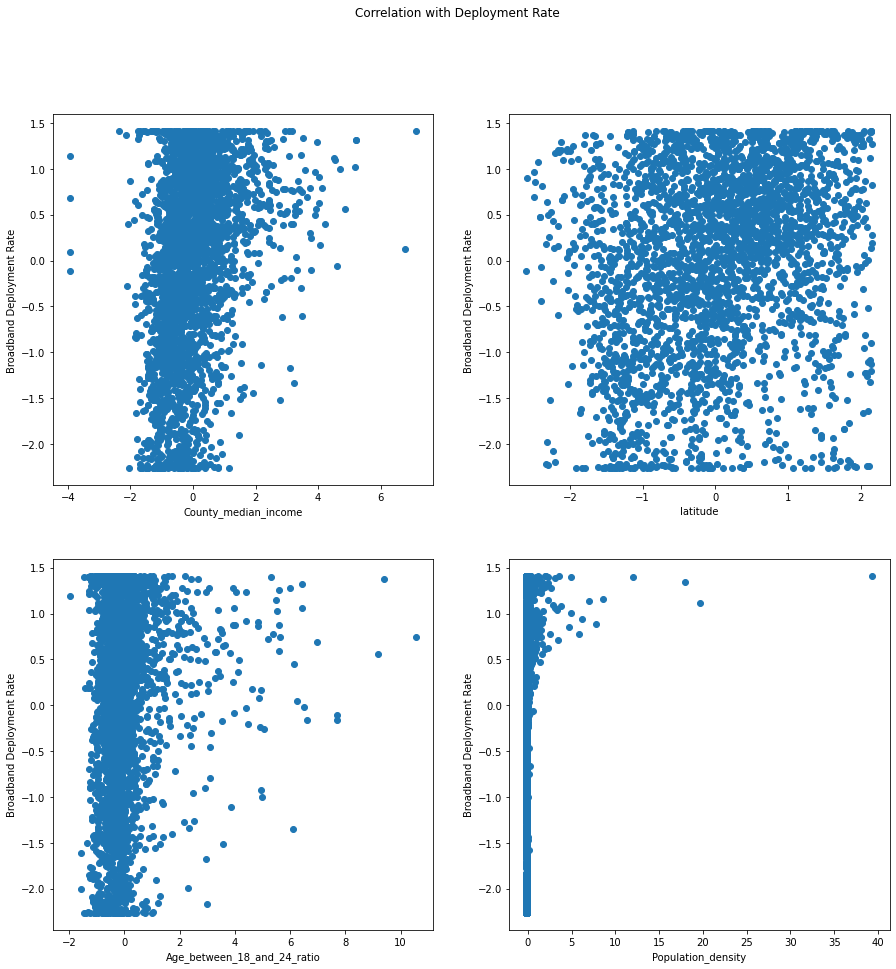

In [40]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['County_median_income'],data_county2['broadband_rate'])
ax[0,0].set_xlabel("County_median_income")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['latitude'],data_county2['broadband_rate'])
ax[0,1].set_xlabel("latitude")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['Age_between_18_and_24_ratio'],data_county2['broadband_rate'])
ax[1,0].set_xlabel("Age_between_18_and_24_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['Population_density'],data_county2['broadband_rate'])
ax[1,1].set_xlabel("Population_density")
ax[1,1].set_ylabel("Broadband Deployment Rate")

In [41]:
#### 4. Regression

lr = LinearRegression()
X = data_county2.drop(['broadband_rate'],axis=1)
y = data_county2['broadband_rate']
lr.fit(X,y)

coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef


,Feature,Coefficients
12,latitude,0.187309
13,longitude,0.180369
1,Age_under_17_ratio,0.145506
3,Age_above_65_ratio,0.122720
4,County_median_income,0.079348
6,One_person_households_ratio,0.066974
2,Age_between_18_and_24_ratio,0.063069
8,Above_high_school_population_ratio,0.051551
0,Population_density,-0.001273
9,male_ratio,-0.006357


In [42]:
x = sm.add_constant(X)
mod = sm.OLS(X,y).fit()
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         broadband_rate   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          3.12e-267
Time:                        12:40:37   Log-Likelihood:                -3635.4
No. Observations:                3019   AIC:                             7301.
Df Residuals:                    3004   BIC:                             7391.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons